In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import operator
from functools import reduce
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tpot import TPOTClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import confusion_matrix

In [2]:
#df=pd.read_csv("https://raw.githubusercontent.com/meauxt/credit-card-default/master/credit_cards_dataset.csv")
#df.to_csv("credit_cards_dataset.csv")
df=pd.read_csv("credit_cards_dataset.csv")
df.rename(columns = {'default.payment.next.month':'default'}, inplace = True)
df['BILL_AMT']=df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['PAY_AMT']=df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']
print(df.columns)
#print(df.head())

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default', 'BILL_AMT', 'PAY_AMT'],
      dtype='object')


Instructions for updating:
Colocations handled automatically by placer.


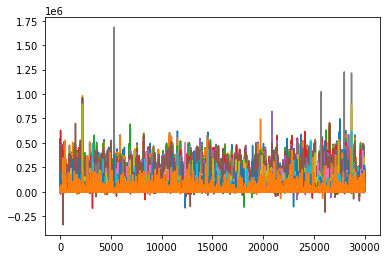

In [3]:
bill_amt=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
pay_amt=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
target=tf.Variable(df['default'])
plt.plot(bill_amt)
plt.plot(pay_amt)

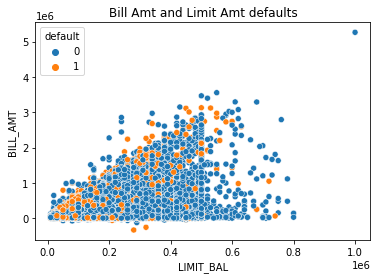

In [4]:
sns.scatterplot(x='LIMIT_BAL',y='BILL_AMT',hue='default', data=df)
plt.title("Bill Amt and Limit Amt defaults")
plt.show()

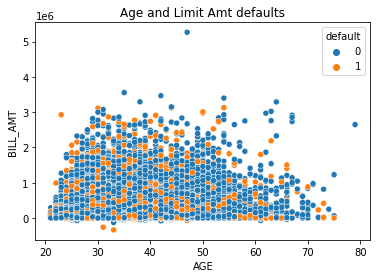

In [5]:
sns.scatterplot(x='AGE',y='BILL_AMT',hue='default', data=df)
plt.title("Age and Limit Amt defaults")
plt.show()

In [6]:
NUMERIC=['LIMIT_BAL', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'BILL_AMT', 'PAY_AMT']

LABELS=['default']


nf_credit_amount = 250000
nf_payment_amount = 250000
nf_age = 60
nf_generic_factor = 7

X=df[NUMERIC]
sex_dummies=pd.get_dummies(df['SEX'],prefix='_sex')
education_dummies=pd.get_dummies(df['EDUCATION'],prefix='_edu')
marriage_dummies=pd.get_dummies(df['MARRIAGE'],prefix='_marriage')
X=pd.concat([X,sex_dummies],axis=1)
X=pd.concat([X,education_dummies],axis=1)
X=pd.concat([X,marriage_dummies],axis=1)
X['LIMIT_BAL']=X['LIMIT_BAL']/nf_credit_amount
X['BILL_AMT']=X['BILL_AMT']/nf_credit_amount
X['BILL_AMT1']=X['BILL_AMT1']/nf_credit_amount
X['BILL_AMT2']=X['BILL_AMT2']/nf_credit_amount
X['BILL_AMT3']=X['BILL_AMT3']/nf_credit_amount
X['BILL_AMT4']=X['BILL_AMT4']/nf_credit_amount
X['BILL_AMT5']=X['BILL_AMT5']/nf_credit_amount
X['BILL_AMT6']=X['BILL_AMT6']/nf_credit_amount

X['PAY_AMT']=X['PAY_AMT']/nf_payment_amount
X['PAY_AMT1']=X['PAY_AMT1']/nf_payment_amount
X['PAY_AMT2']=X['PAY_AMT2']/nf_payment_amount
X['PAY_AMT3']=X['PAY_AMT3']/nf_payment_amount
X['PAY_AMT4']=X['PAY_AMT4']/nf_payment_amount
X['PAY_AMT5']=X['PAY_AMT5']/nf_payment_amount
X['PAY_AMT6']=X['PAY_AMT6']/nf_payment_amount

X['AGE']=X['AGE']/nf_age

X['DEBT_RATIO']=(X['BILL_AMT']-X['PAY_AMT'])/X['LIMIT_BAL']
y=df[LABELS]

#print(X.head())
#print(y)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)


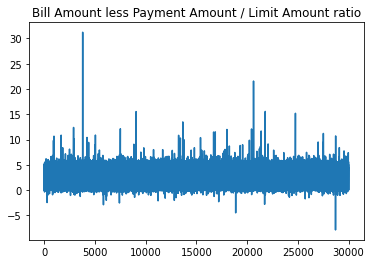

debt ratio above 5 represent risk. Banks should consult borrows at this point.


In [7]:
X['DEBT_RATIO'].plot()
plt.title('Bill Amount less Payment Amount / Limit Amount ratio')
plt.show()
print('debt ratio above 5 represent risk. Banks should consult borrows at this point.')

In [8]:


log_reg_clf=LogisticRegression(max_iter=1000)
log_reg_clf.fit(X_train,y_train)
#print(log_reg_clf.coef_)

predictions=log_reg_clf.predict(X_test)
print("Accuracy={}, Precision={}, Recall={}".format(accuracy_score(y_test, predictions),precision_score(y_test, predictions),recall_score(y_test, predictions)))

    
original_variables=list(X_train.columns)

zipped_together=list(zip(original_variables,log_reg_clf.coef_[0]))
coefs = [list(x) for x in zipped_together]

coefs=pd.DataFrame(coefs, columns=['Variable','Coefficient'])


coefs.sort_values(by=['Coefficient'], axis=0, inplace=True, ascending=False)

print("Pay variable are how many months people have delayed their payments")

print(coefs)

print("Age and low Education level and First Payment and third Bill amount are important features for predicting credit card default")


C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy=0.8093333333333333, Precision=0.6831831831831832, Recall=0.23214285714285715
Pay variable are how many months people have delayed their payments
       Variable  Coefficient
2         PAY_0     0.579337
9     BILL_AMT2     0.507729
25       _edu_1     0.500672
26       _edu_2     0.440574
1           AGE     0.412058
17     PAY_AMT4     0.396788
27       _edu_3     0.395233
10    BILL_AMT3     0.374891
32  _marriage_1     0.315634
16     PAY_AMT3     0.306961
19     PAY_AMT6     0.290453
18     PAY_AMT5     0.194347
34  _marriage_3     0.183722
13    BILL_AMT6     0.162093
33  _marriage_2     0.134922
30       _edu_6     0.126310
3         PAY_2     0.099897
4         PAY_3     0.077571
22       _sex_1     0.049501
5         PAY_4     0.032122
7         PAY_6     0.027616
12    BILL_AMT5     0.023273
6         PAY_5     0.015666
11    BILL_AMT4    -0.002271
20     BILL_AMT    -0.015870
35   DEBT_RATIO    -0.044265
23       _sex_2    -0.064771
28       _edu_4    -0.170245
0    

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


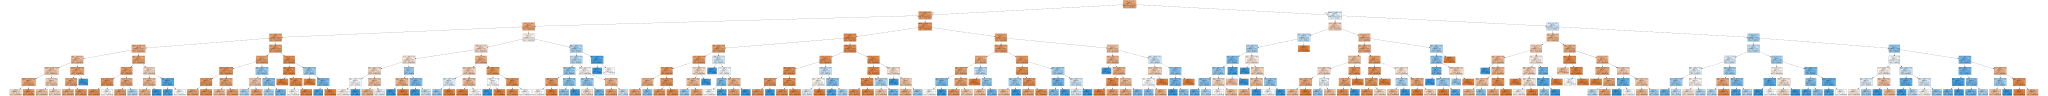

In [16]:
dt= DecisionTreeClassifier(max_depth=8,min_samples_leaf=2, max_features=8, random_state=42)
dt.fit(X_train, y_train)

rf_clf = RandomForestClassifier(max_depth=8,min_samples_leaf=2, max_features=8, random_state=42)
rf_clf.fit(X_train,y_train)

chosen_tree=rf_clf.estimators_[7]

cols=X_train.columns

exported=tree.export_graphviz(
    decision_tree=dt,
    out_file=None,
    feature_names=cols,
    precision=1,
    class_names=['Not default','Default'],
    filled=True)

graph=graphviz.Source(exported)
display(graph)


In [17]:
split_column=chosen_tree.tree_.feature[1]
split_column_name=X_train.columns[split_column]
split_value=chosen_tree.tree_.threshold[1]
print(split_column_name,split_value)

PAY_2 1.5


In [18]:
print("GridSearchCV takes a while to run. optimal: max_depth: 8, min_samples_leaf: 2")
parameter_grid={'max_depth':[2,4,6,8,10],'min_samples_leaf':[1,2,4]}

grid_rf_class=GridSearchCV(
    estimator=rf_clf,
    param_grid=parameter_grid,
    scoring='roc_auc',
    n_jobs=2,
    cv=5,
    refit=True,
    return_train_score=True)

grid_rf_class.fit(X_train,y_train)
predictions=grid_rf_class.predict(X_test)

print(accuracy_score(y_test,predictions));
print(grid_rf_class.best_params_)
print(grid_rf_class.best_score_)

GridSearchCV takes a while to run. optimal: max_depth: 8, min_samples_leaf: 2


C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8204444444444444
{'max_depth': 8, 'min_samples_leaf': 2}
0.7850203356011137


In [19]:
cv_results_df=pd.DataFrame(grid_rf_class.cv_results_)

#print(cv_results_df.loc[:,"params"])

best_row=cv_results_df[cv_results_df["rank_test_score"]==1]

print(best_row.columns)
print(best_row[['param_max_depth', 'param_min_samples_leaf']])

best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row[['param_max_depth', 'param_min_samples_leaf']])

print("Equivalent methods to getting the best row")

best_n_estimators = grid_rf_class.best_params_
print(best_n_estimators)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')
   param_max_depth param_min_samples_leaf
10               8                      2
   param_max_depth param_min_samples_leaf
10               8                      2
Equivalent methods to getting the best row
{'max_depth': 8, 'min_samples_leaf': 2}


In [13]:
learn_rate_list=np.linspace(0.001,2,150)
min_samples_leaf_list=list(range(1,51))

parameter_grid={
    'learning_rate':learn_rate_list,
    'min_samples_leaf': min_samples_leaf_list
}

number_models=10
random_GBM_class=RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=parameter_grid,
    n_iter=number_models,
    scoring='accuracy',
    n_jobs=4,
    cv=10,
    refit=True,
    return_train_score=True)

random_GBM_class.fit(X_train,y_train)
predictions=random_GBM_class.predict(X_test)

print(accuracy_score(y_test,predictions));
print(grid_rf_class.best_params_)
print(grid_rf_class.best_score_)

C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8136666666666666
{'max_depth': 8, 'min_samples_leaf': 2}
0.7850203356011137


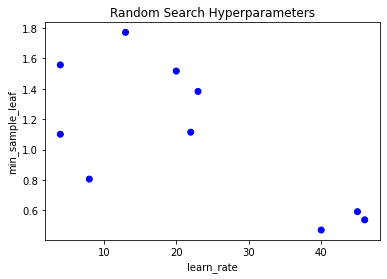

In [14]:
rand_x = list(random_GBM_class.cv_results_['param_learning_rate'])
rand_y = list(random_GBM_class.cv_results_['param_min_samples_leaf'])

x_lims=[np.min(learn_rate_list), np.max(learn_rate_list)]
y_lims=[np.min(min_samples_leaf_list), np.max(min_samples_leaf_list)]

plt.scatter(rand_y,rand_x,c=['blue']*10)
plt.gca().set(xlabel='learn_rate', ylabel='min_sample_leaf', title='Random Search Hyperparameters')
plt.show()

In [23]:
tpot=TPOTClassifier(generations=3, population_size=5, verbosity=2, offspring_size=10, scoring='accuracy', cv=5)
tpot.fit(X_train,y_train)

print(tpot.score(X_test,y_test))

C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Optimization Progress:   0%|          | 0/35 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8193809523809523

Generation 2 - Current best internal CV score: 0.8194285714285716

Generation 3 - Current best internal CV score: 0.8194285714285716

Best pipeline: MLPClassifier(PCA(LogisticRegression(SelectPercentile(input_matrix, percentile=37), C=20.0, dual=False, penalty=l2), iterated_power=1, svd_solver=randomized), alpha=0.1, learning_rate_init=0.001)
0.8207777777777778


C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 0.51013768
Iteration 2, loss = 0.46763584
Iteration 3, loss = 0.45880949
Iteration 4, loss = 0.45391302
Iteration 5, loss = 0.45150990
Iteration 6, loss = 0.44877890
Iteration 7, loss = 0.44592019
Iteration 8, loss = 0.44348979
Iteration 9, loss = 0.44316298
Iteration 10, loss = 0.44089382
Iteration 11, loss = 0.43966750
Iteration 12, loss = 0.43821458
Iteration 13, loss = 0.43906479
Iteration 14, loss = 0.43785279
Iteration 15, loss = 0.43707754
Iteration 16, loss = 0.43635990
Iteration 17, loss = 0.43542799
Iteration 18, loss = 0.43493728
Iteration 19, loss = 0.43343750
Iteration 20, loss = 0.43385820
Iteration 21, loss = 0.43316124
Iteration 22, loss = 0.43255924
Iteration 23, loss = 0.43229561
Iteration 24, loss = 0.43159338
Iteration 25, loss = 0.43264319
Iteration 26, loss = 0.43117664
Iteration 27, loss = 0.43030431
Iteration 28, loss = 0.43007293
Iteration 29, loss = 0.42976117
Iteration 30, loss = 0.42975304
Iteration 31, loss = 0.42949367
Iteration 32, los

Text(0.5, 257.44, 'Predicted label')

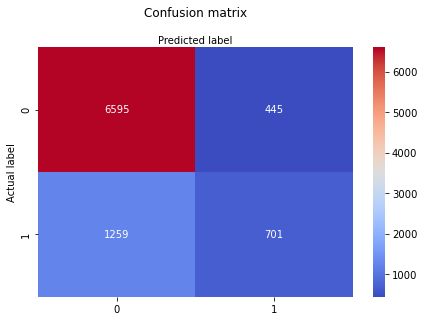

In [55]:
#MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
#       beta_2=0.999, early_stopping=False, epsilon=1e-08,
#       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
#       learning_rate_init=0.001, max_iter=200, momentum=0.9,
#       nesterovs_momentum=True, power_t=0.5, random_state=None,
#       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
#       verbose=False, warm_start=False)

#PCA(LogisticRegression(SelectPercentile(input_matrix, percentile=37), C=20.0, dual=False, penalty=l2), iterated_power=1, svd_solver=randomized)
nn=MLPClassifier(hidden_layer_sizes=(36,150,36), 
                 max_iter=1000, solver='adam', 
                 activation='relu', 
                 alpha=0.1, 
                 learning_rate_init=0.001,
                 verbose=False,
                 momentum=0.9,
                 random_state=42)

nn.fit(X_train,y_train)

#Predicting y for X_val
y_pred = nn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

class_names=[1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


prediction 0 is nondefault 1 is default


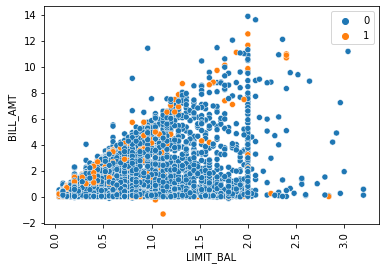

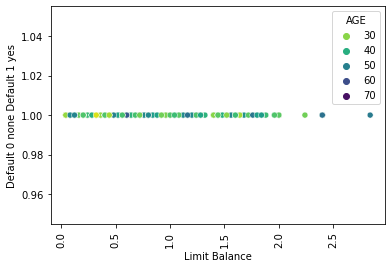

Test Accuracy is %s 81.06666666666666
Train Accuracy is %s 0.8414761904761905


In [56]:


#predictionResults=reduce(operator.concat, predictionResults)
print("prediction 0 is nondefault 1 is default")
pred= y_pred.flatten()
hue=pred
#print(hue)
#print(np.sum(hue))
sns.scatterplot(x=X_test['LIMIT_BAL'],y=X_test['BILL_AMT'],hue=hue)
plt.xticks(rotation=90)
plt.show()

filter=pred>.5
#palette="YlOrBr"
sns.scatterplot(y=pred[filter],x=X_test[filter]['LIMIT_BAL'],hue=X_test[filter]['AGE']*nf_age, palette="viridis_r")
plt.xticks(rotation=90)
plt.ylabel('Default 0 none Default 1 yes')
plt.xlabel('Limit Balance')
plt.show()

print("Test Accuracy is %s",nn.score(X_test,y_test)*100)
pred_train=nn.predict(X_train)
print("Train Accuracy is %s",accuracy_score(y_train, pred_train))